# 实战案例：员工离职原因分析及预测

* 项目：员工离职原因分析及预测
* 作者：[梁斌](https://drbinliang.github.io/)
* 日期：2017/10
* 提问：[小象问答](http://wenda.chinahadoop.cn/)
* 声明：[小象学院](http://www.chinahadoop.cn/)拥有完全知识产权的权利；只限于善意学习者在本课程使用，不得在课程范围外向任何第三方散播。任何其他人或机构不得盗版、复制、仿造其中的创意，我们将保留一切通过法律手段追究违反者的权利

## 1. 项目描述：
人才流失已经成了很多企业正在面临的困境，关键人才的流程对企业的影响尤为明显。关键人才是非常稀缺的，面临着各个竞争对手的挖角而那里保留。客户为中心是很多企业的经营指标，而我们知道满意的客户来自于满意的员工，这层关系是非常深刻而明显的，所以提高员工满意度并了解员工真正不满意的原因就显得非常重要。为了达到这个目的，针对员工保留、提高员工忠诚度的预测性分析讲义非常重要的战略工具。随着大数据技术的发展，不少的人力资源软件供应商都已经开始关注相关问题。

## 2. 数据集描述:
* DataCastle[提供的数据集](http://www.pkbigdata.com/common/cmpt/%E5%91%98%E5%B7%A5%E7%A6%BB%E8%81%8C%E9%A2%84%E6%B5%8B%E8%AE%AD%E7%BB%83%E8%B5%9B_%E7%AB%9E%E8%B5%9B%E4%BF%A1%E6%81%AF.html)
* 数据主要包括影响员工离职的各种因素（工资、出差、工作环境满意度、工作投入度、是否加班、是否升职、工资提升比例等）以及员工是否已经离职的对应记录。数据分为训练数据和测试数据，分别保存在train.csv和test.csv两个文件中。训练数据主要包括1100条记录，31个字段。
* 数据字典
    * Age：员工年龄
    * Attrition：员工是否已经离职，1表示已经离职，2表示未离职，这是目标预测值；
    * BusinessTravel：商务差旅频率，Non-Travel表示不出差，Travel_Rarely表示不经常出差，Travel_Frequently表示经常出差；
    * Department：员工所在部门，Sales表示销售部，Research & Development表示研发部，Human Resources表示人力资源部；
    * DistanceFromHome：公司跟家庭住址的距离，从1到29，1表示最近，29表示最远；
    * Education：员工的教育程度，从1到5，5表示教育程度最高；
    * EducationField：员工所学习的专业领域，Life Sciences表示生命科学，Medical表示医疗，Marketing表示市场营销，Technical Degree表示技术学位，Human Resources表示人力资源，Other表示其他；
    * EmployeeNumber：员工号码；
    * EnvironmentSatisfaction：员工对于工作环境的满意程度，从1到4，1的满意程度最低，4的满意程度最高；
    * Gender：员工性别，Male表示男性，Female表示女性；
    * JobInvolvement：员工工作投入度，从1到4，1为投入度最低，4为投入度最高；
    * JobLevel：职业级别，从1到5，1为最低级别，5为最高级别；
    * JobRole：工作角色：Sales Executive是销售主管，Research Scientist是科学研究员，Laboratory Technician实验室技术员，Manufacturing Director是制造总监，Healthcare Representative是医疗代表，Manager是经理，Sales Representative是销售代表，Research Director是研究总监，Human Resources是人力资源；
    * JobSatisfaction：工作满意度，从1到4，1代表满意程度最低，4代表满意程度最高；
    * MaritalStatus：员工婚姻状况，Single代表单身，Married代表已婚，Divorced代表离婚；
    * MonthlyIncome：员工月收入，范围在1009到19999之间；
    * NumCompaniesWorked：员工曾经工作过的公司数；
    * Over18：年龄是否超过18岁；
    * OverTime：是否加班，Yes表示加班，No表示不加班；
    * PercentSalaryHike：工资提高的百分比；
    * PerformanceRating：绩效评估；
    * RelationshipSatisfaction：关系满意度，从1到4，1表示满意度最低，4表示满意度最高；
    * StandardHours：标准工时；
    * StockOptionLevel：股票期权水平；
    * TotalWorkingYears：总工龄；
    * TrainingTimesLastYear：上一年的培训时长，从0到6，0表示没有培训，6表示培训时间最长；
    * WorkLifeBalance：工作与生活平衡程度，从1到4，1表示平衡程度最低，4表示平衡程度最高；
    * YearsAtCompany：在目前公司工作年数；
    * YearsInCurrentRole：在目前工作职责的工作年数
    * YearsSinceLastPromotion：距离上次升职时长
    * YearsWithCurrManager：跟目前的管理者共事年数；

## 3. 项目任务：
* 3.1 查看分析数据
* 3.2 通过由训练数据所建立的模型以及所给的测试数据，得出测试数据相应的员工是否已经离职的预测。

## 4. 项目实现：

## 4.1 查看分析数据

In [1]:
# 引入必要的包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [2]:
# 加载数据
sample_data = pd.read_csv('../dataset/train.csv')
# 预览数据
sample_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,...,3,80,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,...,1,80,1,33,2,1,5,4,1,4
2,34,1,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,...,4,80,0,9,3,3,9,7,0,6
3,39,0,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,...,3,80,1,21,3,3,21,6,11,8
4,28,1,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,...,1,80,2,1,2,3,1,0,0,0


In [3]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
Age                         1100 non-null int64
Attrition                   1100 non-null int64
BusinessTravel              1100 non-null object
Department                  1100 non-null object
DistanceFromHome            1100 non-null int64
Education                   1100 non-null int64
EducationField              1100 non-null object
EmployeeNumber              1100 non-null int64
EnvironmentSatisfaction     1100 non-null int64
Gender                      1100 non-null object
JobInvolvement              1100 non-null int64
JobLevel                    1100 non-null int64
JobRole                     1100 non-null object
JobSatisfaction             1100 non-null int64
MaritalStatus               1100 non-null object
MonthlyIncome               1100 non-null int64
NumCompaniesWorked          1100 non-null int64
Over18                      1100 non-null object
OverTime              

In [4]:
sample_data.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.999091,0.161818,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,...,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,9.037230,0.368451,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,...,1.095356,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [8]:
# 正负样本的比例
pos_data = sample_data[sample_data['Attrition'] == 1]
neg_data = sample_data[sample_data['Attrition'] == 0]
print('正样本记录数：{}，所占比例：{}'.format(len(pos_data), len(pos_data) / len(sample_data)))
print('负样本记录数：{}，所占比例：{}'.format(len(neg_data), len(neg_data) / len(sample_data)))

正样本记录数：178，所占比例：0.1618181818181818
负样本记录数：922，所占比例：0.8381818181818181


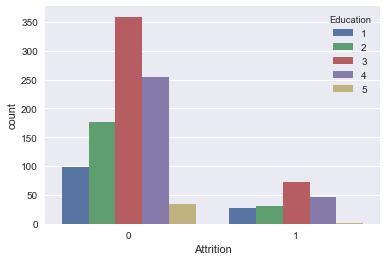

In [9]:
plt.figure()
sns.countplot(x='Attrition', data=sample_data, hue='Education')

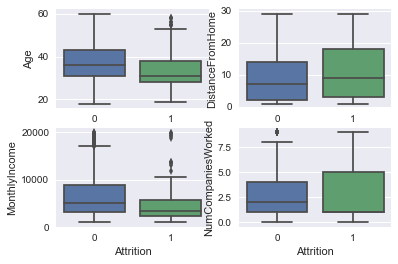

In [10]:
# 单变量关系
plt.figure()

# 离职与年龄的关系
plt.subplot(2, 2, 1)
sns.boxplot(x='Attrition', y='Age', data=sample_data)

# 离职与家庭和公司距离的关系
plt.subplot(2, 2, 2)
sns.boxplot(x='Attrition', y='DistanceFromHome', data=sample_data)

# 离职与月收入的关系
plt.subplot(2, 2, 3)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=sample_data)

# 离职与曾经工作公司数的关系
plt.subplot(2, 2, 4)
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=sample_data)

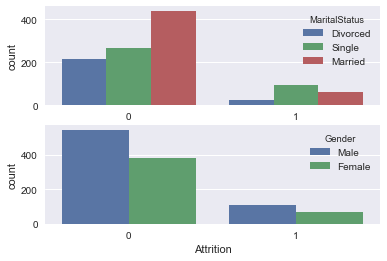

In [11]:
plt.figure()

# 离职与婚姻状况的关系
plt.subplot(2, 1, 1)
sns.countplot(x='Attrition', hue='MaritalStatus', data=sample_data)

# 离职与性别的关系
plt.subplot(2, 1, 2)
sns.countplot(x='Attrition', hue='Gender', data=sample_data)

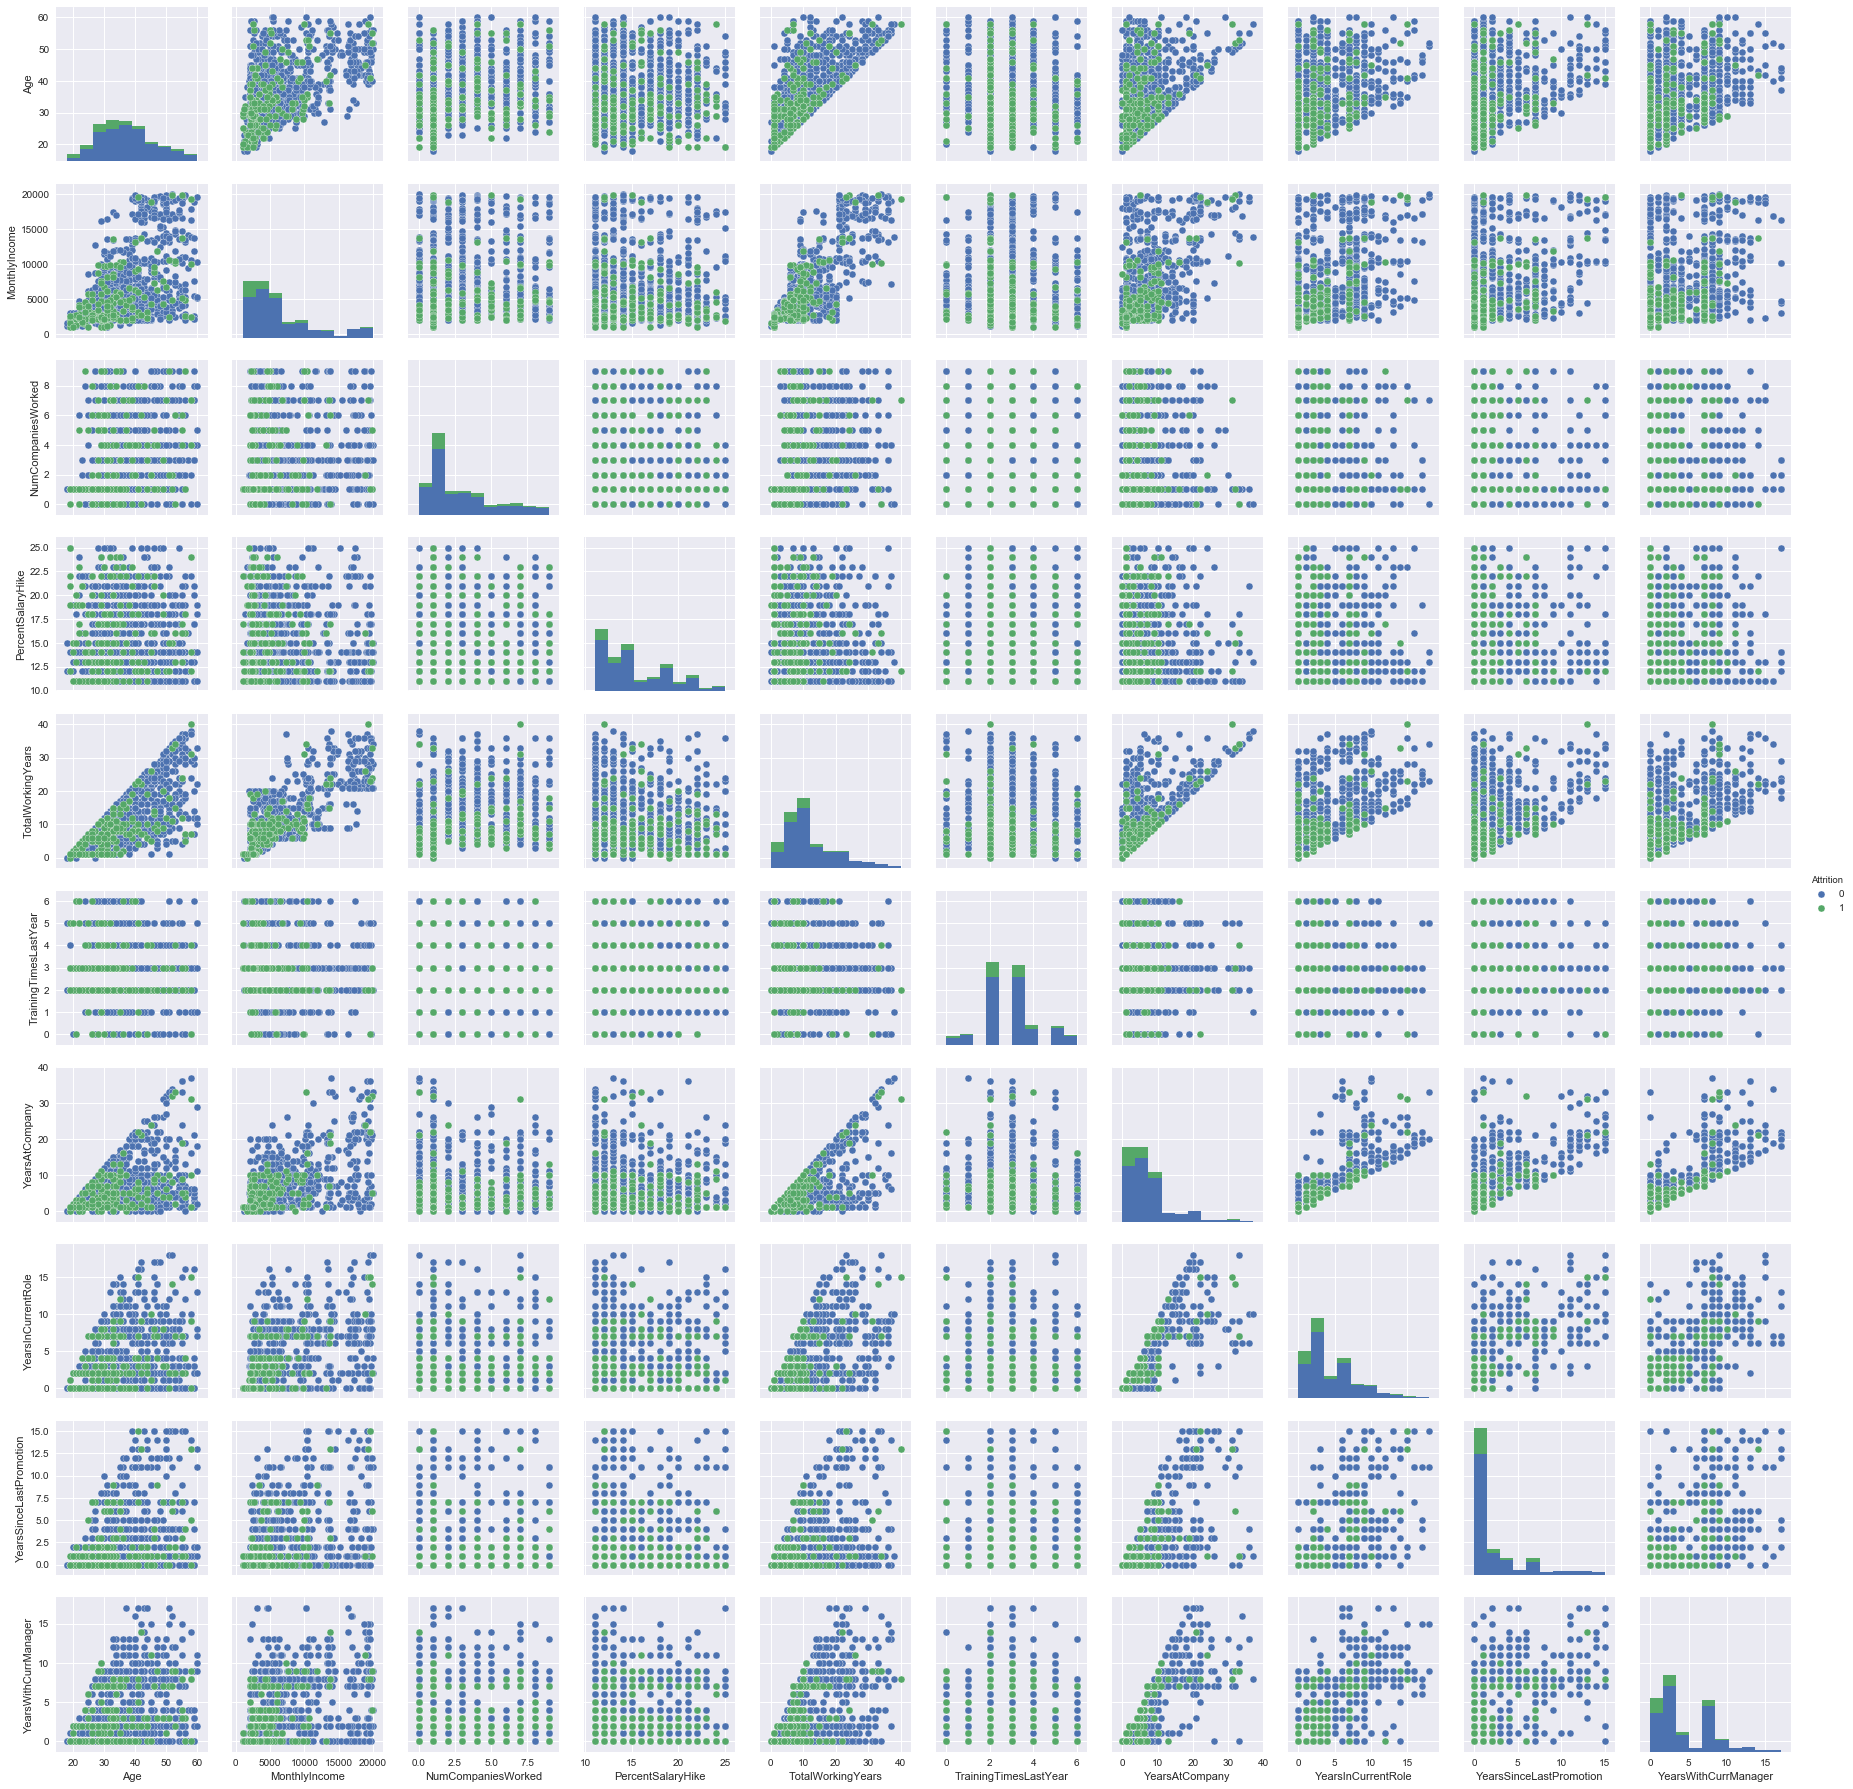

In [32]:
# 多变量关系
sns.pairplot(sample_data, hue='Attrition', vars=['Age', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                                               'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
                                               'YearsSinceLastPromotion', 'YearsWithCurrManager'])

## 4.2 离职预测

### 4.2.1 数据处理

In [12]:
# 数值型数据
num_cols = ['Age', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
# 类别型数据
# 所有类别型数据
# cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
# 本案例只选取3个作为例子
cat_cols = ['Gender', 'MaritalStatus', 'OverTime']
# 有序类别数据
ord_cols = ['DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
           'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

# 目标列
target_col = ['Attrition']

# 所有特征列
total_cols = num_cols + cat_cols + ord_cols

used_data = sample_data[total_cols + target_col]

print('使用{}列数据作为特征'.format(len(total_cols)))

使用23列数据作为特征


In [13]:
# 分割训练集，测试集，80%作为训练集，20%作为测试集
# 保证训练集和测试集中的正负样本的比例一样
# 正负样本的比例

pos_data = used_data[used_data['Attrition'] == 1].reindex()
train_pos_data = pos_data.iloc[:int(len(pos_data) * 0.8)].copy()
test_pos_data = pos_data.iloc[int(len(pos_data) * 0.8) :].copy()

neg_data = used_data[used_data['Attrition'] == 0].reindex()
train_neg_data = neg_data.iloc[:int(len(neg_data) * 0.8)].copy()
test_neg_data = neg_data.iloc[int(len(neg_data) * 0.8) :].copy()

train_data = pd.concat([train_pos_data, train_neg_data])
test_data = pd.concat([test_pos_data, test_neg_data])

In [14]:
print('训练集数据个数', len(train_data))
print('正负样本比例', len(train_pos_data) / len(train_neg_data))
train_data.head()

训练集数据个数 879
正负样本比例 0.1926729986431479


,Age,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,...,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Attrition
2,34,6074,1,24,9,3,9,7,0,6,...,3,1,1,2,3,4,4,0,3,1
4,28,2596,1,15,1,2,1,0,0,0,...,3,1,2,1,2,3,1,2,3,1
10,24,1555,1,11,1,2,1,0,0,0,...,1,4,1,1,3,3,3,1,3,1
12,30,2657,5,11,8,5,5,2,0,4,...,3,4,3,1,1,3,3,0,3,1
19,56,4963,9,18,7,2,5,4,4,3,...,4,2,3,1,2,3,1,3,3,1


In [15]:
print('测试集数据个数', len(test_data))
print('正负样本比例', len(test_pos_data) / len(test_neg_data))
test_data.head()

测试集数据个数 221
正负样本比例 0.1945945945945946


,Age,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,...,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Attrition
879,19,1675,1,19,0,2,0,0,0,0,...,1,4,3,1,3,3,4,0,2,1
883,34,5304,8,13,9,3,5,2,0,4,...,3,1,4,2,4,3,2,0,2,1
884,29,2439,1,24,1,3,1,0,1,0,...,2,4,2,1,4,4,2,0,2,1
886,32,4883,1,18,10,3,10,4,1,1,...,2,4,3,2,3,3,1,1,3,1
891,20,1009,1,11,1,5,1,0,1,1,...,1,4,3,1,3,3,4,0,3,1


### 4.2.2 特征工程

In [16]:
# 对类别型数据进行“独热编码” One-Hot Encoding

# 先进行Label Encoding
# Gender数据
gender_label_enc = preprocessing.LabelEncoder()
train_data['Gender_Label'] = gender_label_enc.fit_transform(train_data['Gender'])

# MaritalStatus数据
marital_label_enc = preprocessing.LabelEncoder()
train_data['Marital_Label'] = marital_label_enc.fit_transform(train_data['MaritalStatus'])

# OverTime数据
ot_label_enc = preprocessing.LabelEncoder()
train_data['OT_Label'] = ot_label_enc.fit_transform(train_data['OverTime'])

In [17]:
print('Gender数据:')
print(train_data.groupby('Gender_Label').size())

print()
print('MaritalStatus数据:')
print(train_data.groupby('Marital_Label').size())

print()
print('OverTime数据:')
print(train_data.groupby('OT_Label').size())

Gender数据:
Gender_Label
0    363
1    516
dtype: int64

MaritalStatus数据:
Marital_Label
0    184
1    414
2    281
dtype: int64

OverTime数据:
OT_Label
0    636
1    243
dtype: int64


In [18]:
# 再进行One-Hot Encoding
one_hot_enc = preprocessing.OneHotEncoder()
train_cat_feats = one_hot_enc.fit_transform(train_data[['Gender_Label', 'Marital_Label', 'OT_Label']]).toarray()
print(train_cat_feats[:5, :])

[[ 0.  1.  0.  0.  1.  0.  1.]
 [ 0.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.]
 [ 1.  0.  0.  0.  1.  0.  1.]
 [ 1.  0.  0.  1.  0.  0.  1.]]


In [19]:
# 对测试集数据进行相应的编码操作
# 注意要使用从训练集中得出的encoder

# 标签编码
# Gender数据
test_data['Gender_Label'] = gender_label_enc.transform(test_data['Gender'])

# MaritalStatus数据
test_data['Marital_Label'] = marital_label_enc.transform(test_data['MaritalStatus'])

# OverTime数据
test_data['OT_Label'] = ot_label_enc.transform(test_data['OverTime'])

# 独热编码
test_cat_feats = one_hot_enc.transform(test_data[['Gender_Label', 'Marital_Label', 'OT_Label']]).toarray()

In [20]:
# 整合所有特征
train_num_feats = train_data[num_cols].values
train_ord_feats = train_data[ord_cols].values
train_feats = np.hstack((train_num_feats, train_ord_feats, train_cat_feats))
train_targets = train_data[target_col].values

# 整合所有特征
test_num_feats = test_data[num_cols].values
test_ord_feats = test_data[ord_cols].values
test_feats = np.hstack((test_num_feats, test_ord_feats, test_cat_feats))
test_targets = test_data[target_col].values

print('训练数据：', train_feats.shape)
print('测试数据：', test_feats.shape)

训练数据： (879, 27)
测试数据： (221, 27)


In [27]:
# 处理不平衡数据
# 过采样“少”的样本
# 安装imblearn包：conda install -c glemaitre imbalanced-learn
# 或者：pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE


print('重采样前：')
print('正样本个数：', len(train_targets[train_targets == 1]))
print('负样本个数：', len(train_targets[train_targets == 0]))

sm = SMOTE(random_state=0)
train_resampled_feats, train_resampled_targets = sm.fit_sample(train_feats, train_targets)
print('重采样后：')
print('正样本个数：', len(train_resampled_targets[train_resampled_targets == 1]))
print('负样本个数：', len(train_resampled_targets[train_resampled_targets == 0]))

重采样前：
正样本个数： 142
负样本个数： 737
重采样后：
正样本个数： 737
负样本个数： 737


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 4.2.3 数据建模

[随机森林](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)<br/>
[逻辑回归](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# # 随机森林
# rf_clf = RandomForestClassifier(random_state=0)
# rf_clf.fit(train_feats, train_targets)

# # 逻辑回归
# lr_clf = LogisticRegression()
# lr_clf.fit(train_feats, train_targets)

# 如果选择“重采样”请取消以下的注释 
# 随机森林
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_resampled_feats, train_resampled_targets)

# 逻辑回归
lr_clf = LogisticRegression()
lr_clf.fit(train_resampled_feats, train_resampled_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 4.2.4 模型验证

In [32]:
from sklearn import metrics

print('测试集中正样本数', len(test_pos_data))
print('测试集中负样本数', len(test_neg_data))

# 随机森林
print('随机森林：')
test_pred = rf_clf.predict(test_feats)
print(metrics.confusion_matrix(test_targets, test_pred, labels=[1, 0]))
print('准确率：', metrics.accuracy_score(test_targets, test_pred))

# 逻辑回归
print('逻辑回归：')
test_pred = lr_clf.predict(test_feats)
print(metrics.confusion_matrix(test_targets, test_pred, labels=[1, 0]))
print('准确率：', metrics.accuracy_score(test_targets, test_pred))

测试集中正样本数 36
测试集中负样本数 185
随机森林：
[[  9  27]
 [ 10 175]]
逻辑回归：
[[ 28   8]
 [ 55 130]]


## 5. 项目总结
* 该项目通过案例分析实践了Python数据分析的常用步骤及技巧，包括:
    * csv数据操作
    * NumPy的简单使用
    * Pandas的简单使用
    * sklearn的简单使用
    * 非平衡数据的处理
* 课后学员可模仿该项目的流程与操作，使用更多的特征，观察对预测结果的影响